# **Importing and Extracting the dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
train_path = r"data\train"
test_path = r"testing\test"

In [3]:
training_data = tf.keras.utils.image_dataset_from_directory(train_path,validation_split=0.1,interpolation='area',image_size=(128,128),batch_size=16,subset='training',seed=42,color_mode='rgb')
validationData = tf.keras.utils.image_dataset_from_directory(train_path,validation_split=0.1,interpolation='area',image_size=(128,128),batch_size=16,subset='validation',seed=42,color_mode='rgb')
testing_data = tf.keras.utils.image_dataset_from_directory(test_path,interpolation='area',image_size=(128,128),shuffle=False,batch_size=16)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [73]:
#Creating list for y_test

test_labels = []
for i in range(0,5):
    for j in range(0,400):
        test_labels.append(i)
y_test = np.array(test_labels,dtype='int8')

print(test_labels)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# **Building and Training Individual Models**

In [5]:
def model_building(base_model):

    for layer in base_model.layers:
        layer.trainable=False

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Rescaling(scale=1./255))
    model.add(tf.keras.layers.RandomFlip("horizontal_and_vertical"))
    model.add(tf.keras.layers.RandomRotation(0.2))
    model.add(base_model)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))

    return model

In [6]:
def model_training(model):
    
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'],run_eagerly=True)
    model_history = model.fit(training_data,shuffle=True,epochs=5,validation_data=validationData)

    return model_history

In [7]:
def save_model(model,name):
    model.save('models/' + name + '.h5')

# **Predictions of Individual Models**

In [8]:
def model_prediction(model):
    return model.predict(testing_data)

# **Model Graphs**

In [9]:
def epoch_vs_accuracy(model_history):
    
    plt.plot(model_history.history['accuracy'])
    plt.plot(model_history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [42]:
def custom_classification_report(y_pred):

    return classification_report(y_test,y_pred)

# **Metrics**

In [11]:
def calculate_metrics(actual, predicted, class_labels):

    tn = np.zeros(len(class_labels))
    fp = np.zeros(len(class_labels))
    tp = np.zeros(len(class_labels))
    fn = np.zeros(len(class_labels))
    specificity = np.zeros(len(class_labels))

    for i, c in enumerate(class_labels):
        actual_c = actual == c
        predicted_c = predicted == c
        tn[i] = np.sum(np.logical_and(actual_c == False, predicted_c == False))
        fp[i] = np.sum(np.logical_and(actual_c == False, predicted_c == True))
        tp[i] = np.sum(np.logical_and(actual_c == True, predicted_c == True))
        fn[i] = np.sum(np.logical_and(actual_c == True, predicted_c == False))
        specificity[i] = tn[i] / (tn[i] + fp[i])

    return tn, fp, tp, fn, specificity

# **Inseption Resnet V2**

In [17]:
ivr2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=[128,128
                                                                                ]+[3],weights= 'imagenet' ,include_top=False)
ivr2 = model_building(ivr2)
ivr2_history = model_training(ivr2)
ivr2_predictions = model_prediction(ivr2)
save_model(ivr2,'IRv2')

Epoch 1/5
450/450 [==============================] - 1499s 3s/step - loss: 0.7944 - accuracy: 0.8417 - val_loss: 0.4243 - val_accuracy: 0.8662
Epoch 2/5
450/450 [==============================] - 1158s 3s/step - loss: 0.3963 - accuracy: 0.8754 - val_loss: 0.4093 - val_accuracy: 0.8662
Epoch 3/5
450/450 [==============================] - 1149s 3s/step - loss: 0.3921 - accuracy: 0.8753 - val_loss: 0.4030 - val_accuracy: 0.8662
Epoch 4/5
450/450 [==============================] - 1147s 3s/step - loss: 0.3926 - accuracy: 0.8757 - val_loss: 0.3966 - val_accuracy: 0.8662
Epoch 5/5
125/125 [==============================] - 106s 847ms/step


c:\Users\Asus\OneDrive\Desktop\DR_detection_using_ensemble_learning\env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


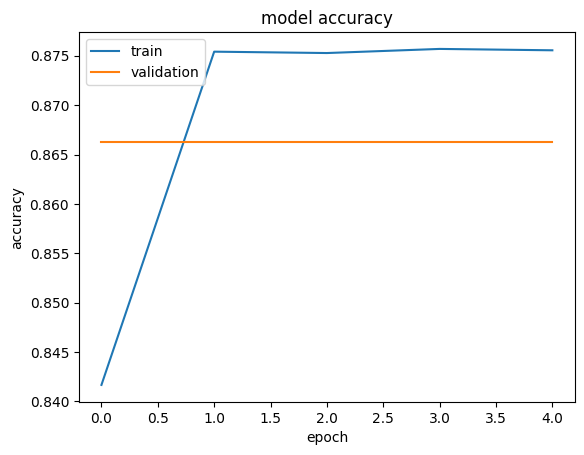

In [21]:
epoch_vs_accuracy(ivr2_history)

In [57]:
predicted_labels = np.argmax(ivr2_predictions, axis=1)

In [58]:
from sklearn.metrics import classification_report

# Assuming you have true labels (y_true) and predicted labels (ivr2_predictions)
report = classification_report(y_test, predicted_labels)

# Print or use the classification report
print(report)

              precision    recall  f1-score   support

           0       0.20      1.00      0.33       400
           1       0.00      0.00      0.00       400
           2       0.00      0.00      0.00       400
           3       0.00      0.00      0.00       400
           4       0.00      0.00      0.00       400

    accuracy                           0.20      2000
   macro avg       0.04      0.20      0.07      2000
weighted avg       0.04      0.20      0.07      2000



c:\Users\Asus\OneDrive\Desktop\DR_detection_using_ensemble_learning\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\OneDrive\Desktop\DR_detection_using_ensemble_learning\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\OneDrive\Desktop\DR_detection_using_ensemble_learning\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [60]:
cm_ivr2 = tf.math.confusion_matrix(y_test,predicted_labels)
cm_ivr2

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[400,   0,   0,   0,   0],
       [400,   0,   0,   0,   0],
       [400,   0,   0,   0,   0],
       [400,   0,   0,   0,   0],
       [400,   0,   0,   0,   0]])>

In [62]:
tn, fp, tp, fn, specificity = calculate_metrics(y_test, predicted_labels, [0,1,2,3,4])
print('Inception Resnet V2 Specificity\n\n',specificity)

Inception Resnet V2 Specificity

 [0. 1. 1. 1. 1.]


<Axes: >

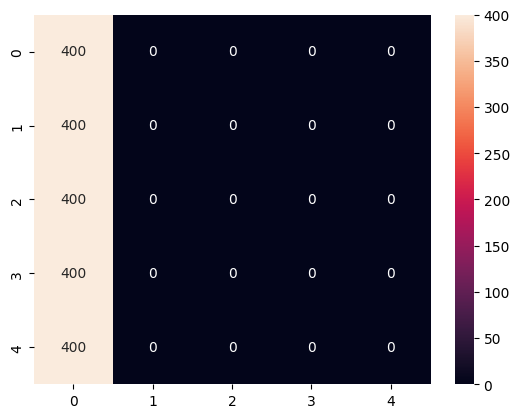

In [63]:
sns.heatmap(cm_ivr2,fmt='d',annot=True)

# **Xception**

In [65]:
xception = tf.keras.applications.xception.Xception(input_shape=[128,128]+[3],weights= 'imagenet' ,include_top=False)
xception = model_building(xception)
xception_history = model_training(xception)
xception_predictions = model_prediction(xception)
save_model(xception,'Xception')

Epoch 1/5
450/450 [==============================] - 1301s 3s/step - loss: 0.7204 - accuracy: 0.8424 - val_loss: 0.4367 - val_accuracy: 0.8662
Epoch 2/5
450/450 [==============================] - 1254s 3s/step - loss: 0.4024 - accuracy: 0.8757 - val_loss: 0.4052 - val_accuracy: 0.8662
Epoch 3/5
450/450 [==============================] - 1119s 2s/step - loss: 0.3933 - accuracy: 0.8760 - val_loss: 0.4115 - val_accuracy: 0.8662
Epoch 4/5
450/450 [==============================] - 1218s 3s/step - loss: 0.3892 - accuracy: 0.8760 - val_loss: 0.4008 - val_accuracy: 0.8662
Epoch 5/5
125/125 [==============================] - 56s 448ms/step


c:\Users\Asus\OneDrive\Desktop\DR_detection_using_ensemble_learning\env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


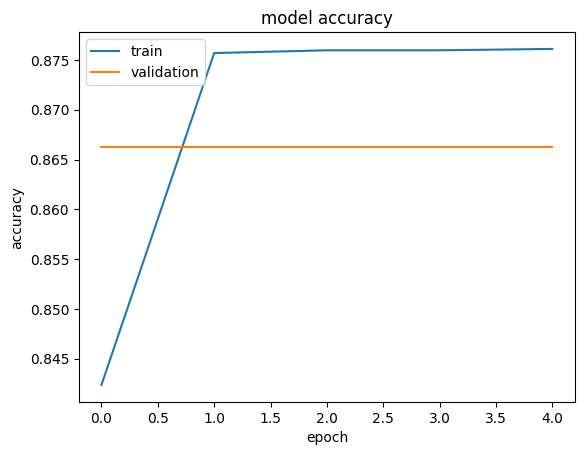

In [66]:
epoch_vs_accuracy(xception_history)

In [68]:
predicted_labels_xception = np.argmax(ivr2_predictions, axis=1)
from sklearn.metrics import classification_report

# Assuming you have true labels (y_true) and predicted labels (ivr2_predictions)
report = classification_report(y_test, predicted_labels)

# Print or use the classification report
print(report)

              precision    recall  f1-score   support

           0       0.20      1.00      0.33       400
           1       0.00      0.00      0.00       400
           2       0.00      0.00      0.00       400
           3       0.00      0.00      0.00       400
           4       0.00      0.00      0.00       400

    accuracy                           0.20      2000
   macro avg       0.04      0.20      0.07      2000
weighted avg       0.04      0.20      0.07      2000



c:\Users\Asus\OneDrive\Desktop\DR_detection_using_ensemble_learning\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\OneDrive\Desktop\DR_detection_using_ensemble_learning\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\OneDrive\Desktop\DR_detection_using_ensemble_learning\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [70]:
cm_xception = tf.math.confusion_matrix(y_test,predicted_labels_xception)
cm_xception

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[400,   0,   0,   0,   0],
       [400,   0,   0,   0,   0],
       [400,   0,   0,   0,   0],
       [400,   0,   0,   0,   0],
       [400,   0,   0,   0,   0]])>

In [71]:
tn, fp, tp, fn, specificity = calculate_metrics(y_test, predicted_labels_xception, [0,1,2,3,4])
print('Xception Specificity\n\n',specificity)

Xception Specificity

 [0. 1. 1. 1. 1.]


<Axes: >

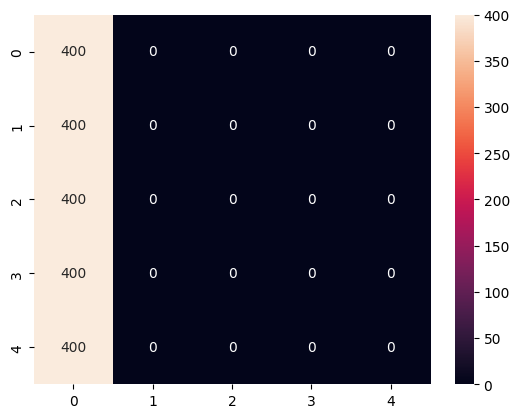

In [72]:
sns.heatmap(cm_xception,fmt='d',annot=True)

# **VGG19**

In [ ]:
vgg = tf.keras.applications.vgg19.VGG19(input_shape=[256,256]+[3],weights= 'imagenet' ,include_top=False)
vgg = model_building(vgg)
vgg_history = model_training(vgg)
vgg_predictions = model_prediction(vgg)
save_model(vgg,'VGG19')

In [ ]:
epoch_vs_accuracy(vgg_history)

In [ ]:
classification_report(vgg_predictions)

In [ ]:
cm_vgg = tf.math.confusion_matrix(y_test,vgg_predictions)
cm_vgg

In [ ]:
tn, fp, tp, fn, specificity = calculate_metrics(y_test, vgg_predictions, [0,1,2,3,4])
print('VGG19 Specificity\n\n',specificity)

In [ ]:
sns.heatmap(cm_vgg,fmt='d',annot=True)

# **Resnet**

In [ ]:
resnet = tf.keras.applications.vgg19.VGG19(input_shape=[256,256]+[3],weights= 'imagenet' ,include_top=False)
resnet = model_building(resnet)
resnet_history = model_training(resnet)
resnet_predictions = model_prediction(resnet)
save_model(resnet,'Resnet')

In [ ]:
epoch_vs_accuracy(resnet_history)

In [ ]:
classification_report(resnet_predictions)

In [ ]:
cm_resnet = tf.math.confusion_matrix(y_test,resnet_predictions)
cm_resnet

In [ ]:
tn, fp, tp, fn, specificity = calculate_metrics(y_test, resnet_predictions, [0,1,2,3,4])
print('Resnet Specificity\n\n',specificity)

In [ ]:
sns.heatmap(cm_resnet,fmt='d',annot=True)

# **Densenet**

In [ ]:
densenet = tf.keras.applications.vgg19.VGG19(input_shape=[256,256]+[3],weights= 'imagenet' ,include_top=False)
densenet = model_building(densenet)
densenet_history = model_training(densenet)
densenet_predictions = model_prediction(densenet)
save_model(densenet,'Densenet')

In [ ]:
epoch_vs_accuracy(densenet_history)

In [ ]:
classification_report(densenet_predictions)

In [ ]:
cm_densenet = tf.math.confusion_matrix(y_test,densenet_predictions)
cm_densenet

In [ ]:
tn, fp, tp, fn, specificity = calculate_metrics(y_test, densenet_predictions, [0,1,2,3,4])
print('Densenet Specificity\n\n',specificity)

In [ ]:
sns.heatmap(cm_densenet,fmt='d',annot=True)